MILESTONE 3 
TASK 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_it_support_tickets.csv")
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,3.0,NaN,4
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,3.0,NaN,4
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2023-06-01 18:05:38,1
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2023-06-01 01:57:40,1
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2023-06-01 19:53:42,1


In [2]:
# Convert date columns to datetime
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

# Create Resolution_Time in HOURS
df['Resolution_Time'] = (
    df['Time to Resolution'] - df['First Response Time']
).dt.total_seconds() / 3600

df[['First Response Time', 'Time to Resolution', 'Resolution_Time']].head()


,First Response Time,Time to Resolution,Resolution_Time
0,2023-06-01 12:15:36,NaT,NaN
1,2023-06-01 16:45:38,NaT,NaN
2,2023-06-01 11:14:38,2023-06-01 18:05:38,6.850000
3,2023-06-01 07:29:40,2023-06-01 01:57:40,-5.533333
4,2023-06-01 00:12:42,2023-06-01 19:53:42,19.683333


In [3]:
overall_avg_resolution = df['Resolution_Time'].mean()
round(overall_avg_resolution, 2)


np.float64(-0.06)

In [4]:
avg_resolution_by_type = df.groupby('Ticket Type')['Resolution_Time'].mean()
avg_resolution_by_type


Ticket Type
Billing inquiry        -0.207813
Cancellation request   -0.165924
Product inquiry        -0.243183
Refund request          0.218037
Technical issue         0.066466
Name: Resolution_Time, dtype: float64

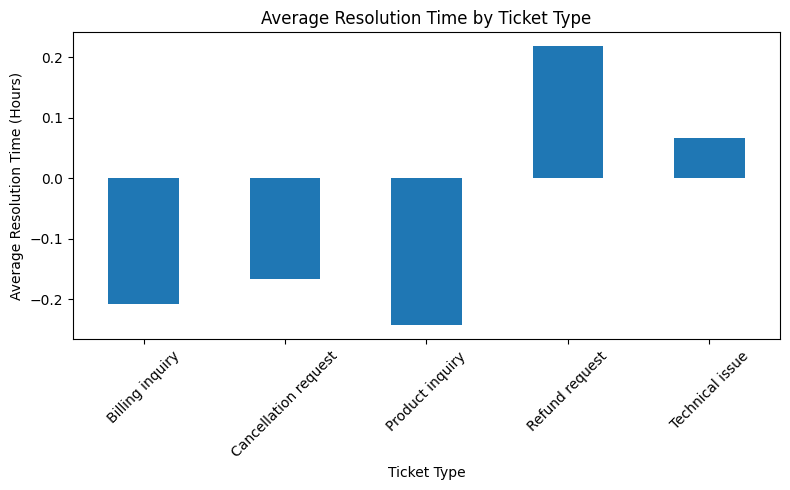

In [5]:
plt.figure(figsize=(8,5))
avg_resolution_by_type.plot(kind='bar')
plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (Hours)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TASK 2

In [6]:
avg_resolution_by_priority = df.groupby('Ticket Priority')['Resolution_Time'].mean()
avg_resolution_by_priority


Ticket Priority
Critical   -0.200689
High       -0.068818
Low         0.385223
Medium     -0.307853
Name: Resolution_Time, dtype: float64

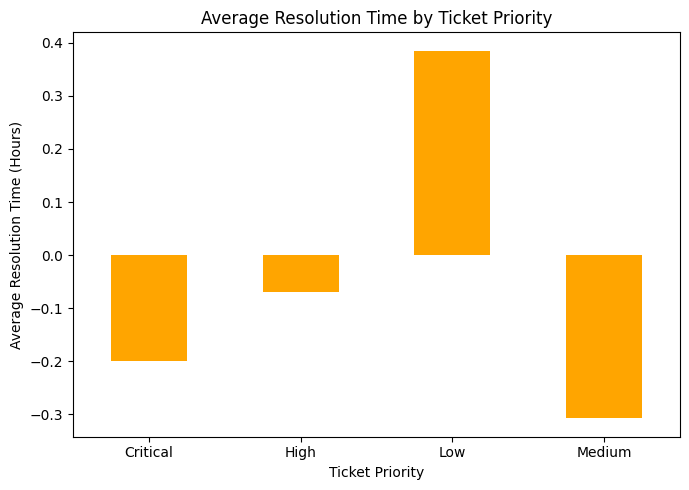

In [7]:
plt.figure(figsize=(7,5))
avg_resolution_by_priority.plot(kind='bar', color='orange')
plt.title("Average Resolution Time by Ticket Priority")
plt.xlabel("Ticket Priority")
plt.ylabel("Average Resolution Time (Hours)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [8]:
high_priority_df = df[df['Ticket Priority'] == 'High']
high_priority_df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score,Resolution_Time
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,2023-05-31 23:51:49,3,-17.916667
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,2023-06-01 09:27:51,3,-2.633333
14,15,Amy Hill,medinasteven@example.net,48,Female,Sony PlayStation,2020-02-29,Billing inquiry,Product setup,I'm having an issue with the {product_purchase...,Closed,Officer moment world sing parent available.,High,Chat,2023-06-01 06:22:55,2023-05-31 23:08:55,4.0,2023-05-31 23:08:55,3,-7.233333
15,16,Elizabeth Foley,amy41@example.net,18,Other,GoPro Action Camera,2021-06-24,Billing inquiry,Product recommendation,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,High,Social media,2023-06-01 15:09:57,NaT,3.0,NaN,3,NaN
17,18,Joshua Castillo,mooredeborah@example.org,56,Female,Microsoft Xbox Controller,2020-09-07,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,High,Chat,2023-06-01 21:05:01,NaT,3.0,NaN,3,NaN


In [9]:
avg_high_priority_by_type = high_priority_df.groupby('Ticket Type')['Resolution_Time'].mean()
avg_high_priority_by_type


Ticket Type
Billing inquiry        -1.609877
Cancellation request   -0.202688
Product inquiry        -0.424936
Refund request          1.442511
Technical issue         0.138217
Name: Resolution_Time, dtype: float64

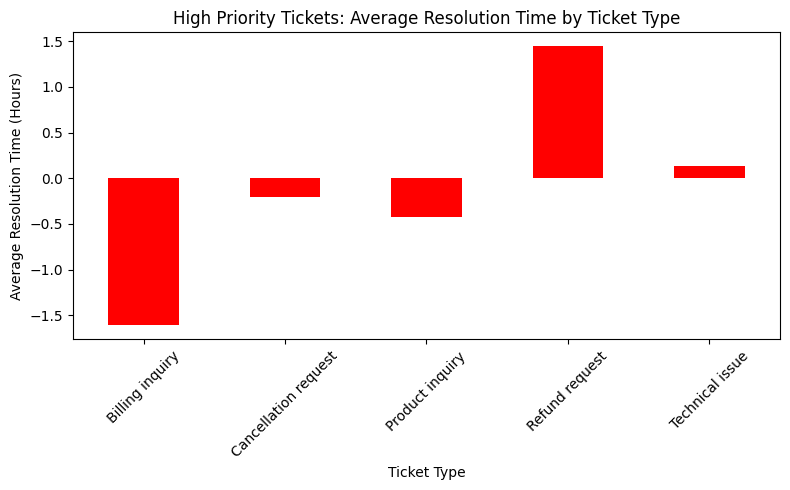

In [10]:
plt.figure(figsize=(8,5))
avg_high_priority_by_type.plot(kind='bar', color='red')
plt.title("High Priority Tickets: Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Average Resolution Time (Hours)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TASK 3 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_it_support_tickets.csv")
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,3.0,NaN,4
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,3.0,NaN,4
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2023-06-01 18:05:38,1
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2023-06-01 01:57:40,1
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2023-06-01 19:53:42,1


In [4]:
unresolved_df = df[df['Time to Resolution'].isna()]
unresolved_df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,3.0,NaN,4
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,3.0,NaN,4
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,Open,NaN,Low,Social media,NaN,NaN,3.0,NaN,1
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,Open,NaN,Critical,Social media,NaN,NaN,3.0,NaN,4
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Social media,NaN,NaN,3.0,NaN,4


In [6]:
unresolved_high_df = unresolved_df[unresolved_df['Ticket Priority'] == 'High']
unresolved_high_df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score
15,16,Elizabeth Foley,amy41@example.net,18,Other,GoPro Action Camera,2021-06-24,Billing inquiry,Product recommendation,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,High,Social media,2023-06-01 15:09:57,NaN,3.0,NaN,3
17,18,Joshua Castillo,mooredeborah@example.org,56,Female,Microsoft Xbox Controller,2020-09-07,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,High,Chat,2023-06-01 21:05:01,NaN,3.0,NaN,3
18,19,Wendy Davis,brenda20@example.net,19,Male,LG Washing Machine,2021-09-23,Product inquiry,Peripheral compatibility,I'm having an issue with the {product_purchase...,Open,NaN,High,Social media,NaN,NaN,3.0,NaN,3
20,21,Suzanne Holmes,rogermcgrath@example.net,28,Other,HP Pavilion,2021-05-31,Refund request,Payment issue,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,High,Chat,2023-06-01 05:08:05,NaN,3.0,NaN,3
27,28,Michael Mcdowell,jeffersonmichael@example.net,21,Other,Fitbit Charge,2020-10-12,Cancellation request,Product setup,I'm having an issue with the {product_purchase...,Open,NaN,High,Phone,NaN,NaN,3.0,NaN,3


In [13]:
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')


In [14]:
df['Resolution_Time'] = (
    df['Time to Resolution'] - df['First Response Time']
).dt.total_seconds() / (60 * 60 * 24)


In [15]:
df[['First Response Time', 'Time to Resolution', 'Resolution_Time']].head()


,First Response Time,Time to Resolution,Resolution_Time
0,2023-06-01 12:15:36,NaT,NaN
1,2023-06-01 16:45:38,NaT,NaN
2,2023-06-01 11:14:38,2023-06-01 18:05:38,0.285417
3,2023-06-01 07:29:40,2023-06-01 01:57:40,-0.230556
4,2023-06-01 00:12:42,2023-06-01 19:53:42,0.820139


In [16]:
unresolved_df = df[df['Resolution_Time'].isna()]
unresolved_df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score,Month,Resolution_Time
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,...,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,3.0,NaN,4,2023-06,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,3.0,NaN,4,2023-06,NaN
5,6,Rebecca Fleming,sheenasmith@example.com,53,Male,Microsoft Office,2020-07-28,Cancellation request,Payment issue,I'm facing a problem with my {product_purchase...,...,NaN,Low,Social media,NaT,NaT,3.0,NaN,1,NaT,NaN
6,7,Jacqueline Wright,donaldkeith@example.org,24,Other,Microsoft Surface,2020-02-23,Product inquiry,Refund request,I'm unable to access my {product_purchased} ac...,...,NaN,Critical,Social media,NaT,NaT,3.0,NaN,4,NaT,NaN
7,8,Denise Lee,joelwilliams@example.com,23,Male,Philips Hue Lights,2020-08-09,Refund request,Battery life,I'm having an issue with the {product_purchase...,...,NaN,Critical,Social media,NaT,NaT,3.0,NaN,4,NaT,NaN


In [17]:
unresolved_high_df = unresolved_df[unresolved_df['Ticket Priority'] == 'High']
unresolved_high_df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,...,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score,Month,Resolution_Time
15,16,Elizabeth Foley,amy41@example.net,18,Other,GoPro Action Camera,2021-06-24,Billing inquiry,Product recommendation,I'm having an issue with the {product_purchase...,...,NaN,High,Social media,2023-06-01 15:09:57,NaT,3.0,NaN,3,2023-06,NaN
17,18,Joshua Castillo,mooredeborah@example.org,56,Female,Microsoft Xbox Controller,2020-09-07,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,...,NaN,High,Chat,2023-06-01 21:05:01,NaT,3.0,NaN,3,2023-06,NaN
18,19,Wendy Davis,brenda20@example.net,19,Male,LG Washing Machine,2021-09-23,Product inquiry,Peripheral compatibility,I'm having an issue with the {product_purchase...,...,NaN,High,Social media,NaT,NaT,3.0,NaN,3,NaT,NaN
20,21,Suzanne Holmes,rogermcgrath@example.net,28,Other,HP Pavilion,2021-05-31,Refund request,Payment issue,I'm having an issue with the {product_purchase...,...,NaN,High,Chat,2023-06-01 05:08:05,NaT,3.0,NaN,3,2023-06,NaN
27,28,Michael Mcdowell,jeffersonmichael@example.net,21,Other,Fitbit Charge,2020-10-12,Cancellation request,Product setup,I'm having an issue with the {product_purchase...,...,NaN,High,Phone,NaT,NaT,3.0,NaN,3,NaT,NaN


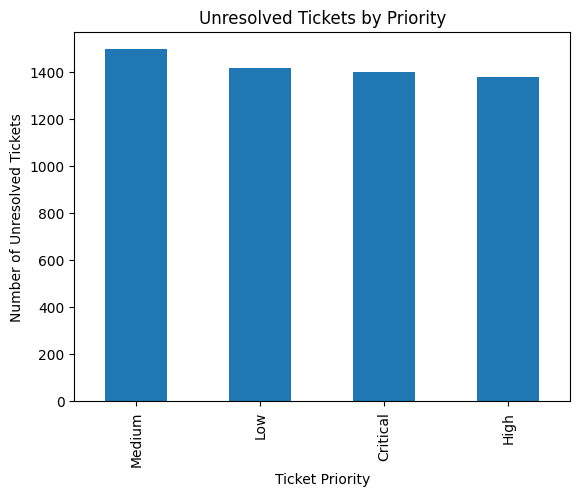

In [18]:
import matplotlib.pyplot as plt

unresolved_priority_count = unresolved_df['Ticket Priority'].value_counts()

plt.figure()
unresolved_priority_count.plot(kind='bar')
plt.title('Unresolved Tickets by Priority')
plt.xlabel('Ticket Priority')
plt.ylabel('Number of Unresolved Tickets')
plt.show()


In [19]:
df['Month'] = df['First Response Time'].dt.to_period('M')


In [20]:
monthly_avg_resolution = df.groupby('Month')['Resolution_Time'].mean()
monthly_avg_resolution


Month
2023-05    0.488967
2023-06   -0.017023
Freq: M, Name: Resolution_Time, dtype: float64

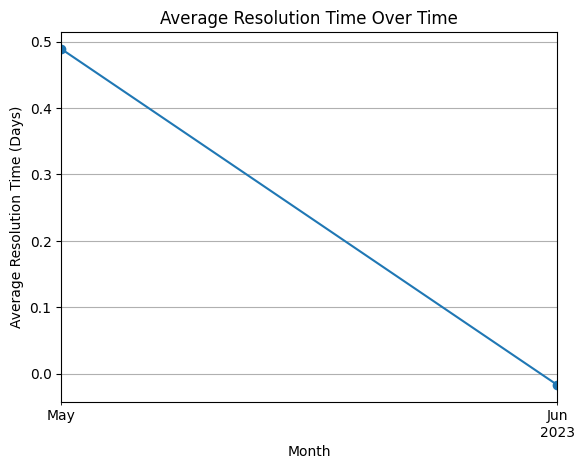

In [21]:
plt.figure()
monthly_avg_resolution.plot(kind='line', marker='o')
plt.title('Average Resolution Time Over Time')
plt.xlabel('Month')
plt.ylabel('Average Resolution Time (Days)')
plt.grid(True)
plt.show()


TASK 4

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df = pd.read_csv("cleaned_it_support_tickets.csv")
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,3.0,NaN,4
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,3.0,NaN,4
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2023-06-01 18:05:38,1
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2023-06-01 01:57:40,1
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2023-06-01 19:53:42,1


In [33]:
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])


In [34]:
df['Resolution_Time'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score,Resolution_Time
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,3.0,NaN,4,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,3.0,NaN,4,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0,2023-06-01 18:05:38,1,6.850000
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0,2023-06-01 01:57:40,1,-5.533333
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0,2023-06-01 19:53:42,1,19.683333


In [35]:
avg_resolution_type = df.groupby('Ticket Type')['Resolution_Time'].mean().round(2)
avg_resolution_type


Ticket Type
Billing inquiry        -0.21
Cancellation request   -0.17
Product inquiry        -0.24
Refund request          0.22
Technical issue         0.07
Name: Resolution_Time, dtype: float64

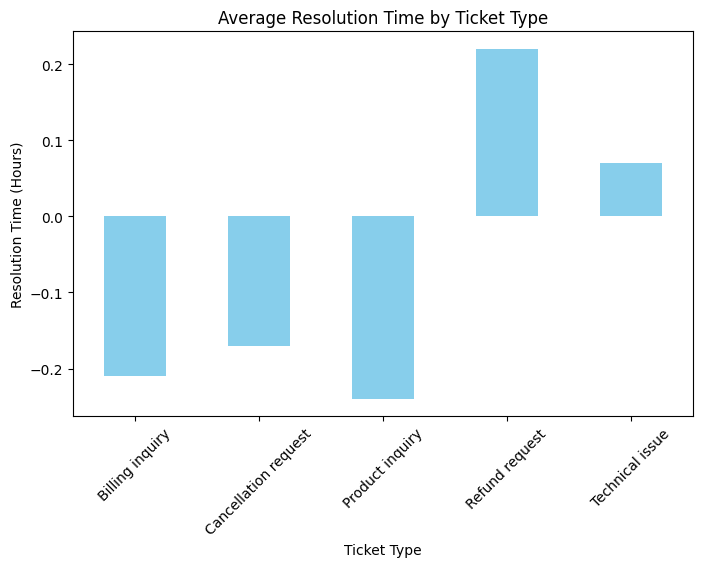

In [36]:
plt.figure(figsize=(8,5))
avg_resolution_type.plot(kind='bar', color='skyblue')
plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Resolution Time (Hours)")
plt.xticks(rotation=45)
plt.show()


In [37]:
avg_resolution_region = df.groupby('Ticket Channel')['Resolution_Time'].mean().round(2)
avg_resolution_region


Ticket Channel
Chat            0.20
Email           0.01
Phone          -0.56
Social media    0.12
Name: Resolution_Time, dtype: float64

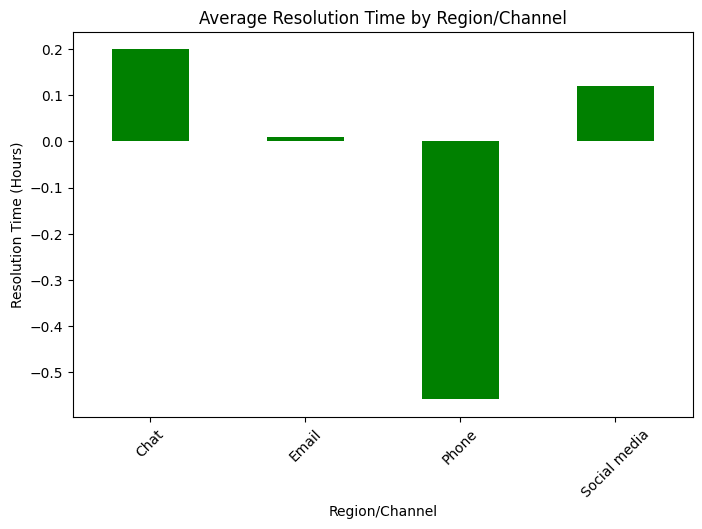

In [38]:
plt.figure(figsize=(8,5))
avg_resolution_region.plot(kind='bar', color='green')
plt.title("Average Resolution Time by Region/Channel")
plt.xlabel("Region/Channel")
plt.ylabel("Resolution Time (Hours)")
plt.xticks(rotation=45)
plt.show()


In [39]:
high_priority_df = df[df['Ticket Priority'] == 'High']
high_priority_df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating,Resolution_Duration,Priority_Score,Resolution_Time
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0,2023-05-31 23:51:49,3,-17.916667
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0,2023-06-01 09:27:51,3,-2.633333
14,15,Amy Hill,medinasteven@example.net,48,Female,Sony PlayStation,2020-02-29,Billing inquiry,Product setup,I'm having an issue with the {product_purchase...,Closed,Officer moment world sing parent available.,High,Chat,2023-06-01 06:22:55,2023-05-31 23:08:55,4.0,2023-05-31 23:08:55,3,-7.233333
15,16,Elizabeth Foley,amy41@example.net,18,Other,GoPro Action Camera,2021-06-24,Billing inquiry,Product recommendation,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,High,Social media,2023-06-01 15:09:57,NaT,3.0,NaN,3,NaN
17,18,Joshua Castillo,mooredeborah@example.org,56,Female,Microsoft Xbox Controller,2020-09-07,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,High,Chat,2023-06-01 21:05:01,NaT,3.0,NaN,3,NaN


In [40]:
high_priority_type = high_priority_df.groupby('Ticket Type')['Resolution_Time'].mean().round(2)
high_priority_type


Ticket Type
Billing inquiry        -1.61
Cancellation request   -0.20
Product inquiry        -0.42
Refund request          1.44
Technical issue         0.14
Name: Resolution_Time, dtype: float64

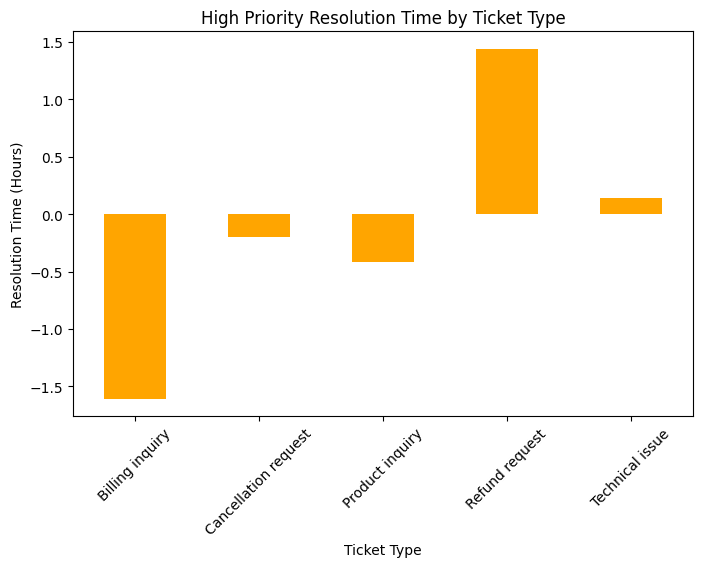

In [41]:
plt.figure(figsize=(8,5))
high_priority_type.plot(kind='bar', color='orange')
plt.title("High Priority Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Resolution Time (Hours)")
plt.xticks(rotation=45)
plt.show()


In [42]:
high_priority_region = high_priority_df.groupby('Ticket Channel')['Resolution_Time'].mean().round(2)
high_priority_region


Ticket Channel
Chat            0.97
Email           0.17
Phone          -1.07
Social media   -0.45
Name: Resolution_Time, dtype: float64

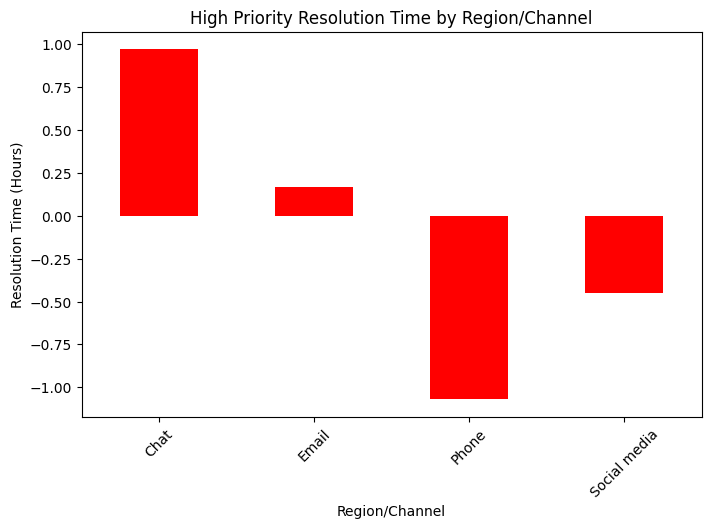

In [43]:
plt.figure(figsize=(8,5))
high_priority_region.plot(kind='bar', color='red')
plt.title("High Priority Resolution Time by Region/Channel")
plt.xlabel("Region/Channel")
plt.ylabel("Resolution Time (Hours)")
plt.xticks(rotation=45)
plt.show()


module 6 day 1

In [44]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'Resolution_Duration', 'Priority_Score',
       'Resolution_Time'],
      dtype='object')

In [45]:
ticket_count_region = df['Ticket Channel'].value_counts()
ticket_count_region


Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64

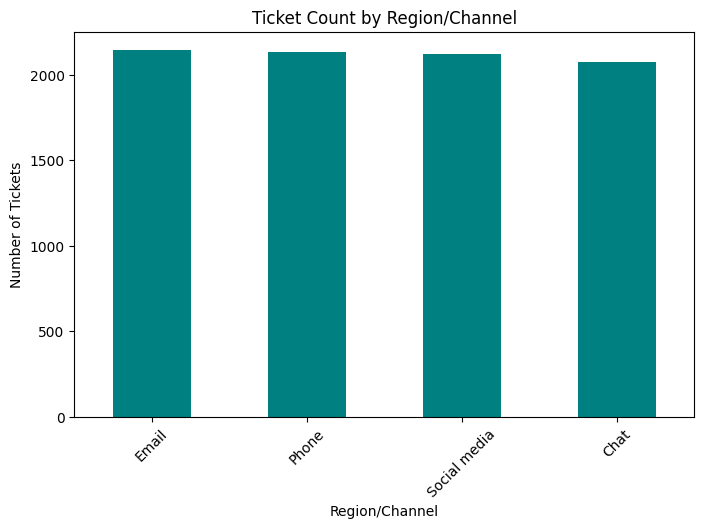

In [46]:
plt.figure(figsize=(8,5))
ticket_count_region.plot(kind='bar', color='teal')

plt.title("Ticket Count by Region/Channel")
plt.xlabel("Region/Channel")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)

plt.show()


In [47]:
heatmap_data = ticket_count_region.to_frame()
heatmap_data


,count
Ticket Channel,
Email,2143
Phone,2132
Social media,2121
Chat,2073


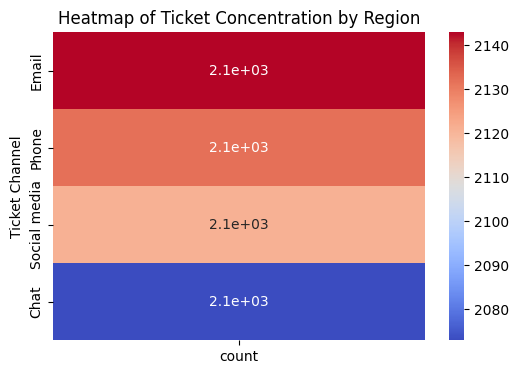

In [48]:
plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")

plt.title("Heatmap of Ticket Concentration by Region")
plt.show()


In [49]:
highest_region = ticket_count_region.idxmax()
lowest_region = ticket_count_region.idxmin()

highest_region, lowest_region


('Email', 'Chat')

module 6 day 2 

In [50]:
df['Ticket Type'].value_counts()


Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

In [51]:
df['Ticket Channel'].value_counts()


Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64

In [52]:
category_region_count = df.groupby(['Ticket Channel', 'Ticket Type']).size().unstack()
category_region_count


Ticket Type,Billing inquiry,Cancellation request,Product inquiry,Refund request,Technical issue
Ticket Channel,,,,,
Chat,398,408,388,426,453
Email,405,448,427,455,408
Phone,434,426,424,427,421
Social media,397,413,402,444,465


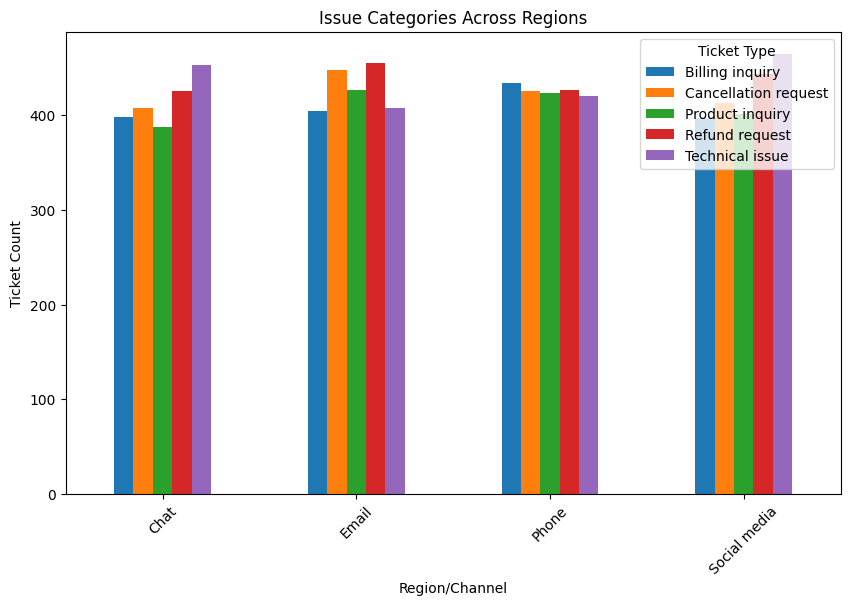

In [53]:
category_region_count.plot(kind='bar', figsize=(10,6))

plt.title("Issue Categories Across Regions")
plt.xlabel("Region/Channel")
plt.ylabel("Ticket Count")
plt.xticks(rotation=45)

plt.show()


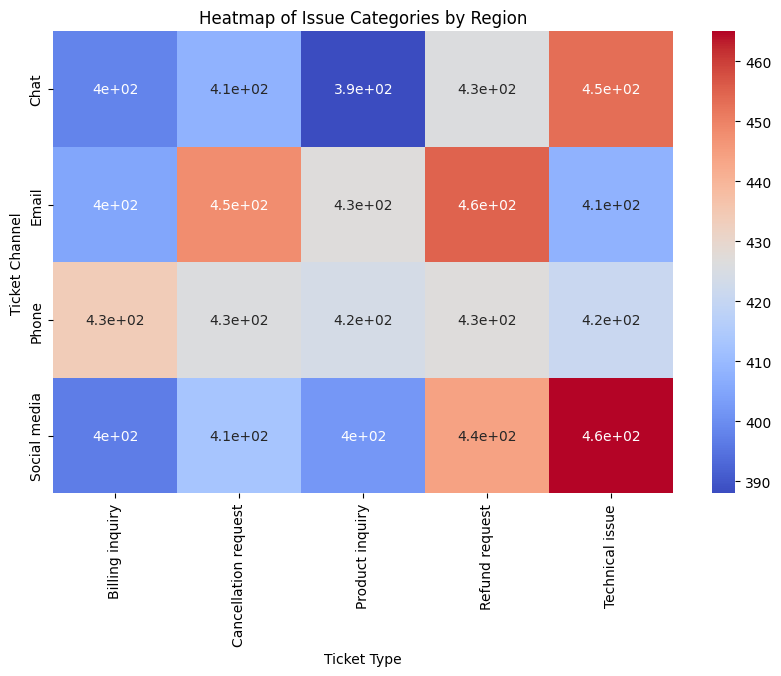

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(category_region_count, annot=True, cmap="coolwarm")

plt.title("Heatmap of Issue Categories by Region")
plt.show()


In [55]:
dominant_category = category_region_count.idxmax(axis=1)
dominant_category


Ticket Channel
Chat            Technical issue
Email            Refund request
Phone           Billing inquiry
Social media    Technical issue
dtype: object

In [56]:
category_region_count 

Ticket Type,Billing inquiry,Cancellation request,Product inquiry,Refund request,Technical issue
Ticket Channel,,,,,
Chat,398,408,388,426,453
Email,405,448,427,455,408
Phone,434,426,424,427,421
Social media,397,413,402,444,465


Regions show different issues patterns some regions have higher technical issues while others face more building or refund related problems this helps organisations allocate resources effectively.